In [48]:
import pandas as pd

In [49]:
df = pd.read_csv("Cleaned_data.csv")

In [50]:
df['firstName']

0      Jovana
1        Mohd
2        Andy
3       Barry
4        Luke
       ...   
75    Melinda
76     Joshua
77      Lexi 
78       Evin
79     Joshua
Name: firstName, Length: 80, dtype: object

In [51]:
df.shape

(80, 65)

In [52]:
df = df[df['firstName']!='Bahman']

In [53]:
df['jobTitle'].dropna()

0                        Sales Executive
1                          Head of Sales
2                            Peer Mentor
3        Senior Human Resource Executive
4              Senior Executive Engineer
                     ...                
73               Human Resources Manager
75    USFS Field Accounting AP Team Lead
76                      Receiver/Stocker
78              Senior Business Support 
79                      Receiver/Stocker
Name: jobTitle, Length: 64, dtype: object

In [54]:
# !pip install wordcloud

In [55]:
float_rows = df.loc[df['jobTitle'].apply(lambda x: type(x) == float)]

In [56]:
df = df.drop(float_rows.index)

In [57]:

text = " ".join(title for title in df["jobTitle"])

print(text)

Sales Executive Head of Sales Peer Mentor Senior Human Resource Executive Senior Executive Engineer Board Member Humanistic Management Network MAN Culture Change Ambassador Career Break Customer Success Manager Retired President Senior Support Desk Technician Founder and CEO Senior System Engineer & Acting Manager C++ Developer Business Development Manager Business Intern Human Resources Manager Director, Transportation and Logistics Content Writer and Recruiting Consultant Learning Environment Coordinator Co-founder & Chief Technology Officer Senior Procurement Specialist Learning Environment Coordinator Human Resources Manager Compensation Manager Senior Executive Engineer Business Development Manager Global Director, Operations & Customer Experience Business IT Project Manager Peer Mentor DevOps Engineer Content Writer Business Development Manager Assistant Manager - HR Project Director Junior Field Engineer Junior Field Engineer Peer Mentor Eutrophication Working Area Leader  Servi

In [58]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

string_to_clean = text

string_to_clean = string_to_clean.lower()

words = string_to_clean.split()

stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word not in stop_words]

clean_string = ' '.join(filtered_words)

print(clean_string)


sales executive head sales peer mentor senior human resource executive senior executive engineer board member humanistic management network man culture change ambassador career break customer success manager retired president senior support desk technician founder ceo senior system engineer & acting manager c++ developer business development manager business intern human resources manager director, transportation logistics content writer recruiting consultant learning environment coordinator co-founder & chief technology officer senior procurement specialist learning environment coordinator human resources manager compensation manager senior executive engineer business development manager global director, operations & customer experience business project manager peer mentor devops engineer content writer business development manager assistant manager - hr project director junior field engineer junior field engineer peer mentor eutrophication working area leader service delivery manager

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aokiji/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


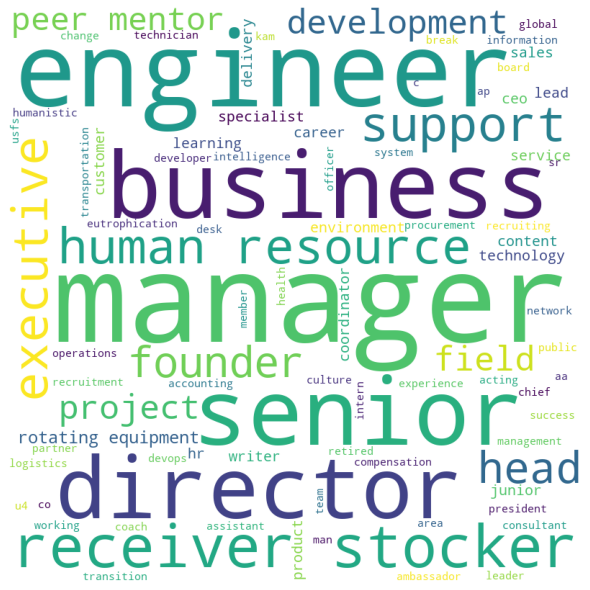

In [83]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = [], min_font_size = 10).generate(clean_string)

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)
# plt.title("Top 20 words in job title",fontsize=20)

plt.show()

In [71]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
df = pd.read_csv("Cleaned_data.csv")


In [72]:
df = df[df['firstName']!='Bahman']

In [73]:
df['comment']

0     That's true on many occasions. But my experien...
1                                                betul'
2     Sadly very true and very present  in HEI's  no...
3     Could be .... Reality checks. I encountered a ...
4     reminder..,.we must not forget that the boss c...
                            ...                        
75    HR always sides with the company...in many ins...
76    Lexi Coleman there's actually a trick to that....
77                       Joshua Mascitelli I always do'
78                                               Agree'
79    Lexi Coleman that's good. My best advice is to...
Name: comment, Length: 69, dtype: object

In [74]:
df['clean_comment'] = df['comment'].apply(lambda x: re.sub('[^A-Za-z\s]+', '', x))

In [75]:
df['clean_comment']

0     Thats true on many occasions But my experience...
1                                                 betul
2     Sadly very true and very present  in HEIs  now...
3     Could be  Reality checks I encountered a sente...
4     reminderwe must not forget that the boss can h...
                            ...                        
75    HR always sides with the companyin many instan...
76    Lexi Coleman theres actually a trick to that I...
77                        Joshua Mascitelli I always do
78                                                Agree
79    Lexi Coleman thats good My best advice is to u...
Name: clean_comment, Length: 69, dtype: object

In [76]:
df['clean_comment'] = df['clean_comment'].apply(lambda x : x.lower())

In [77]:
df['clean_comment'] = df['clean_comment'].apply(word_tokenize)

In [78]:
stop_words = set(stopwords.words('english'))
df['clean_comment'] = df['clean_comment'].apply(lambda x: [word for word in x if word not in stop_words])

In [79]:
all_words = ' '.join([word for row in df['clean_comment'] for word in row])

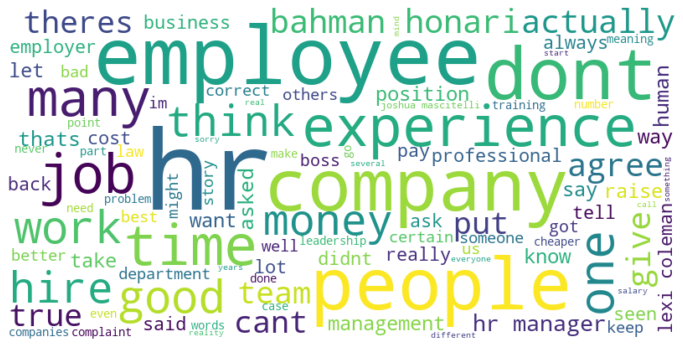

In [85]:
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(all_words)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [20]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import seaborn as sns

In [21]:
stemmer = PorterStemmer()
df['clean_comment'] = df['clean_comment'].apply(lambda x: [stemmer.stem(word) for word in x])

In [22]:
df['clean_comment']

0     [that, true, mani, occas, experi, hr, good, di...
1                                               [betul]
2                  [sadli, true, present, hei, nowaday]
3     [could, realiti, check, encount, sentenc, ofte...
4     [reminderw, must, forget, boss, hire, fire, hr...
                            ...                        
75    [hr, alway, side, companyin, mani, instanc, ph...
76    [lexi, coleman, there, actual, trick, hard, sk...
77                          [joshua, mascitelli, alway]
78                                               [agre]
79    [lexi, coleman, that, good, best, advic, use, ...
Name: clean_comment, Length: 80, dtype: object

In [23]:
sia = SentimentIntensityAnalyzer()
def get_sentiment(row):
    return sia.polarity_scores(' '.join(row))


In [24]:
df['sentiment'] = df['clean_comment'].apply(get_sentiment)

In [25]:
def categorize_sentiment(score):
    comp_score = score['compound']
    if comp_score > 0:
        return 'Positive'
    elif comp_score < 0:
        return 'Negative'
    else:
        return 'Neutral'

In [26]:
df['sentiment_category'] = df['sentiment'].apply(categorize_sentiment)

In [27]:
df['sentiment_category']

0     Positive
1      Neutral
2     Positive
3      Neutral
4     Negative
        ...   
75     Neutral
76    Positive
77     Neutral
78     Neutral
79    Positive
Name: sentiment_category, Length: 80, dtype: object

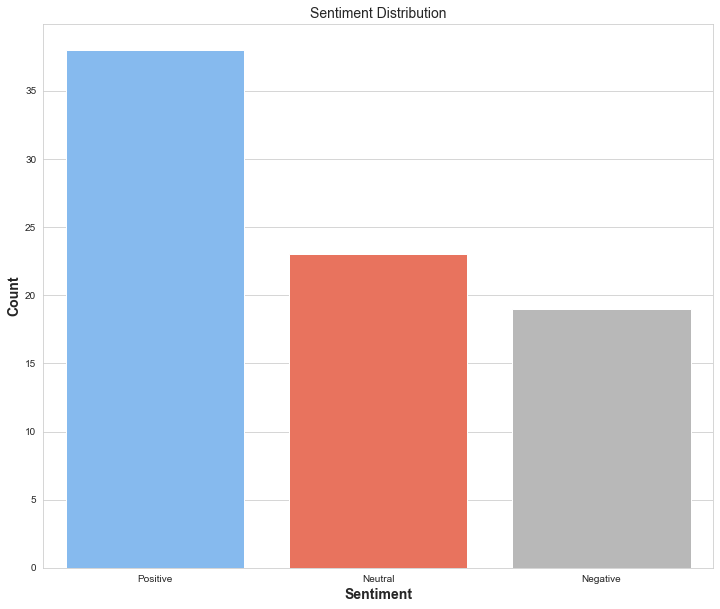

In [28]:
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize=(12,10))
sns.countplot(x='sentiment_category', data=df, palette=['#75baff', '#ff6347', '#b8b8b8'])
plt.title('Sentiment Distribution', fontsize=14)
plt.xlabel('Sentiment', fontsize=14,fontweight='bold')
plt.ylabel('Count', fontsize=14,fontweight='bold')
plt.show()

In [29]:
# df.to_csv("Cleaned_data_with_sentiments.csv")